## Рубежный контроль №1

### Выполнила: Мащенко Е.И., ИУ5-24М
### Вариант №5

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline 
sns.set(style="ticks")

### Задача № 5

Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "one-hot encoding".

In [51]:
data = pd.read_csv('Customers.csv', sep=',')

In [52]:
data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [53]:
data_features = list(zip(
# признаки
[i for i in data.columns],
zip(
    # типы колонок
    [str(i) for i in data.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('CustomerID', ('int64', 0)),
 ('Gender', ('object', 0)),
 ('Age', ('int64', 0)),
 ('Annual Income ($)', ('int64', 0)),
 ('Spending Score (1-100)', ('int64', 0)),
 ('Profession', ('object', 35)),
 ('Work Experience', ('int64', 0)),
 ('Family Size', ('int64', 0))]

In [55]:
pd.get_dummies(data[['Profession']]).head()

,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0


### Задача № 25

Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе межквартильного размаха.

In [78]:
data2 = pd.read_csv('test.csv', sep=',')
data2 = data2.dropna(axis=0, how='any') 
display(data2.shape) 
data2.head()

(2418, 291)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
19,30493,2015-07-02,77.7,52.6,2,5,5,1958.0,3,8.5,...,118,50,9,2,15,36,1,10,102,10
21,30495,2015-07-02,67.2,45.1,14,16,5,1978.0,3,7.7,...,72,26,4,0,9,31,1,10,70,9
24,30498,2015-07-02,32.5,18.7,4,9,1,1971.0,1,6.6,...,24,6,3,0,9,17,0,10,55,11
26,30500,2015-07-02,74.0,41.7,17,17,1,2016.0,2,1.0,...,34,12,3,0,12,10,0,1,49,5


In [79]:
col = "floor"

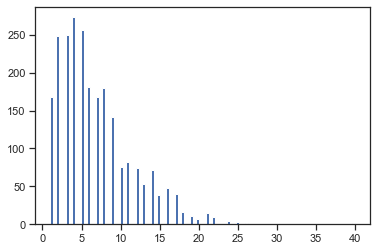

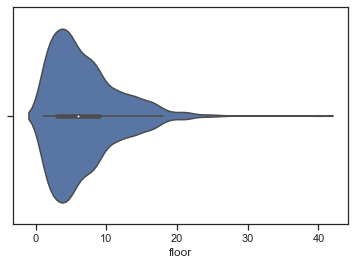

In [80]:
plt.hist(data2[[col]], 100) 
plt.show()
sns.violinplot(x=data2[col]);

На гистограмме видны выбросы в районе 20, ≈ 30, ≈ 40,

In [81]:
K = 1.5 #Значение K обычно выбирается равным 1,5
IQR = data2[col].quantile(0.75) - data2[col].quantile(0.25)

# Вычисление верхней и нижней границы
lower_boundary = data2[col].quantile(0.25) - (K * IQR)
upper_boundary = data2[col].quantile(0.75) + (K * IQR)

In [82]:
 # Флаги для удаления выбросов
outliers_temp = np.where(data2[col] > upper_boundary, True, 
                         np.where(data2[col] < lower_boundary, True, False))
outliers_temp

array([False, False, False, ..., False, False, False])

In [83]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

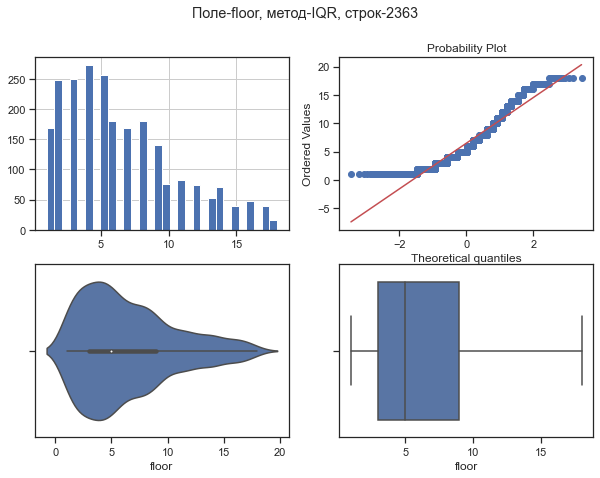

In [84]:
# Удаление данных на основе флага
data_trimmed = data2.loc[~(outliers_temp), ]  
title = 'Поле-{}, метод-{}, строк-{}'.format(col, 'IQR', data_trimmed.shape[0])
diagnostic_plots(data_trimmed, col, title)

### Дополнительное задание

Для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

<AxesSubplot:xlabel='floor'>

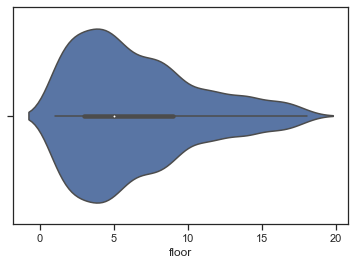

In [86]:
sns.violinplot(x=data_trimmed[col])